### create high quality figures

In [17]:
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [84]:
# create sample data 
a = list(np.linspace(50,80, 5))
b = list(np.linspace(42,80, 5))

In [85]:
a,b

([50.0, 57.5, 65.0, 72.5, 80.0], [42.0, 51.5, 61.0, 70.5, 80.0])

In [86]:
vals = a+b
groups = ['Gene_a']*5 + ['Control']*5

In [87]:
# testing for statistical significance, pvalue

from scipy import stats 
stats.mannwhitneyu(a,b)

MannwhitneyuResult(statistic=14.5, pvalue=0.7532980334628383)

In [88]:
groups

['Gene_a',
 'Gene_a',
 'Gene_a',
 'Gene_a',
 'Gene_a',
 'Control',
 'Control',
 'Control',
 'Control',
 'Control']

/var/folders/l1/dzcw8wr90wxdt447b9wlfw3r0000gn/T/ipykernel_19573/1080882348.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = groups, y = vals, capsize = 0.5,


(0.0, 84.0)

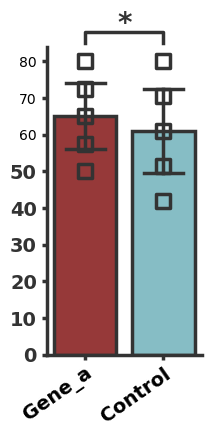

In [89]:
# show single graph together, plot and data points 
plt.figure(figsize = (2, 4))  # change graph size
ax = sns.barplot(x = groups, y = vals, capsize = 0.5, 
                 edgecolor = '0.2',
                 lw = 2.5,
                 err_kws={'linewidth': 2.5, 'color': '0.2'},
#                  palette = ['brown', 'mistyrose']
                 palette = ['brown', '#7bc5d0'],    # value from eyedropper
#                  hue = 0.9
#                  errcolor = '0.2'
                )

# add *kwargs to pass additinal parameters, e.g. marker line
# fc : face color
kwargs = {'edgecolor': '0.2', 'linewidth': 2.5, 'fc': 'none'}

ax = sns.swarmplot(x = groups, y = vals,
                 marker = 's',  # square
                 s = 10,   #  marker size 
                 **kwargs
                  )

# get y max val 
prev_lim = ax.get_ylim()[1]

# add p* significance value 
max_val = max(vals)
plt.plot([0,0,1,1], [max_val+5, max_val+8, max_val+8, max_val+5],
        lw = 2.5, color = '0.2',
        clip_on = False)   # keep fig content 
plt.text(x = 0.5, y = max_val+8, s = '*', ha = 'center', size = 20,
        weight = 'bold', color = '0.2')   # show '*'

# adjust figure 
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')
    
# hide top and right line
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add labels 
plt.xticks(size = 14, rotation = 35, 
           rotation_mode = "anchor", ha = 'right', weight = 'bold')
plt.yticks(size = 14, weight = 'bold', color = '0.2')

ax.tick_params(width = 2.5, color = '0.2')

plt.ylim(top = prev_lim)

In [75]:
plt.savefig('bar_test.png', bbox_inches = 'tight', 
           dpi = 250, 
           facecolor = ax.get_facecolor())

<Figure size 640x480 with 0 Axes>

In [67]:
!ls bar_test.png

bar_test.png


In [90]:
# for publication, save as svg 
plt.savefig('bar_test.svg', bbox_inches = 'tight')

<Figure size 640x480 with 0 Axes>

### subplot

In [95]:
import pandas as pd 

# create sample data 
a = list(np.linspace(50,80, 10))
b = list(np.linspace(42,80, 10))

# create 3 lists of sample values
vals = a+b 
gene = ['Gene_a']*10 + ['Control']*10
groups = ['Treated']*5 + ['Untreated']*5 + ['Treated']*5 + ['Untreated']*5

# zip 3 lists and add column headers
df = pd.DataFrame(zip(vals, gene, groups), columns = ['Value', 'Gene', 'Treatment', ])

In [96]:
df.head()

,Value,Gene,Treatment
0,50.000000,Gene_a,Treated
1,53.333333,Gene_a,Treated
2,56.666667,Gene_a,Treated
3,60.000000,Gene_a,Treated
4,63.333333,Gene_a,Treated


/var/folders/l1/dzcw8wr90wxdt447b9wlfw3r0000gn/T/ipykernel_19573/2093379123.py:5: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': '0.2'}` instead.

  ax = sns.barplot(data = df, x = 'Gene', y = 'Value',


Text(16.97222222222222, 0.5, 'Values')

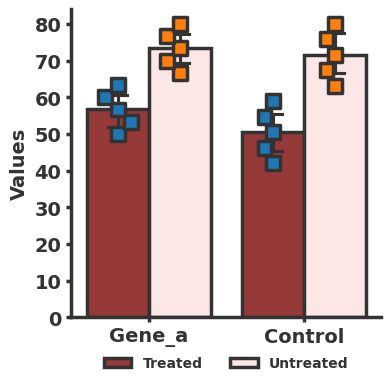

In [134]:
# subplot
plt.figure(figsize = (4, 4))  

# send to dataframe here
ax = sns.barplot(data = df, x = 'Gene', y = 'Value', 
                 capsize = 0.25, 
                 edgecolor = '0.2',
                 lw = 2.5,
#                  err_kws={'linewidth': 2.5, 'color': '0.2'},
                 errcolor = '0.2',
                 palette = ['brown', 'mistyrose'],   
                 hue = 'Treatment'
                )

# add *kwargs to pass additinal parameters, e.g. marker line
# fc : face color
kwargs = {'edgecolor': '0.2', 'linewidth': 2.5, 'fc': 'none'}

ax = sns.swarmplot(data = df, 
                 x = 'Gene', y = 'Value',
                 hue = 'Treatment',
                 dodge = True,
                 marker = 's',  # square
                 s = 10,   #  marker size 
                 **kwargs
                  )

# get y max val 
prev_lim = ax.get_ylim()[1]

# add p* significance value 
max_val = max(vals)

handles, labels = ax.get_legend_handles_labels()

# show labels of "Treated", "Untreated" at bottom
plt.legend(handles[0:2], labels[0:2], 
           loc = 10, bbox_to_anchor = (0.5, -0.15),
           ncol = 2, frameon = False, fontsize = 14, 
           labelcolor = '0.2', prop = {'weight': 'bold'}
          )   # hide labels 

# adjust figure 
for axis in ['bottom', 'left']:
    ax.spines[axis].set_linewidth(2.5)
    ax.spines[axis].set_color('0.2')
    
# hide top and right line
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# add labels 
plt.xticks(size = 14, ha = 'center', weight = 'bold', color = '0.2')
plt.yticks(size = 14, weight = 'bold', color = '0.2')

ax.tick_params(width = 2.5, color = '0.2')

plt.xlabel('')
plt.ylabel('Values', size = 14, weight = 'bold', color = '0.2')
# plt.ylim(top = prev_lim)